<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Regression_problems_ML/blob/main/Food__Demand_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_center_info=pd.read_csv("/content/fulfilment_center_info.csv")
df_meal_info=pd.read_csv("/content/meal_info.csv")
df_train=pd.read_csv("/content/train.csv")

In [3]:
df_test=pd.read_csv("/content/test_QoiMO9B.csv")

In [4]:
df_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [5]:
df_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df_meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


# Merging dataset

In [9]:
data=pd.merge(df_train, df_center_info ,on='center_id')
data2=pd.merge(df_test, df_center_info ,on='center_id')

In [10]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [11]:
df_data=pd.merge(data,df_meal_info,on='meal_id')
new_test=pd.merge(data2,df_meal_info,on='meal_id')

In [12]:
df_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [15]:
df_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [16]:
df_test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [17]:
df_test.describe(include='all')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [18]:
df_data.describe(include='all')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548,456548.000000,456548,456548
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,14,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TYPE_A,NaN,Beverages,Italian
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262881,NaN,127890,122925
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,NaN,4.083590,NaN,NaN
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,NaN,1.091686,NaN,NaN
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,NaN,0.900000,NaN,NaN
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,NaN,3.600000,NaN,NaN
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,NaN,4.000000,NaN,NaN
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,NaN,4.500000,NaN,NaN


# EDA

Text(0.5, 1.0, 'Scatter plot Base Price Vs Checkout Price')

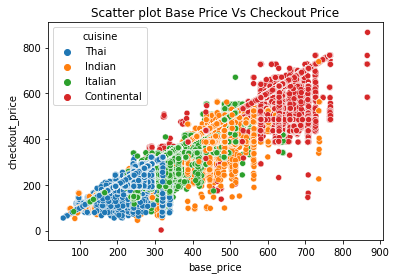

In [19]:
sns.scatterplot(data=df_data ,x='base_price',y='checkout_price',hue='cuisine')
plt.title('Scatter plot Base Price Vs Checkout Price')

Text(0.5, 1.0, ' Base Price Vs Number of Orders')

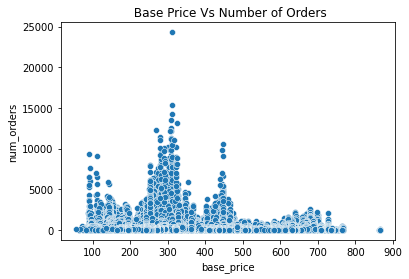

In [20]:
sns.scatterplot(data= df_data, x='base_price',y='num_orders')
plt.title(' Base Price Vs Number of Orders')

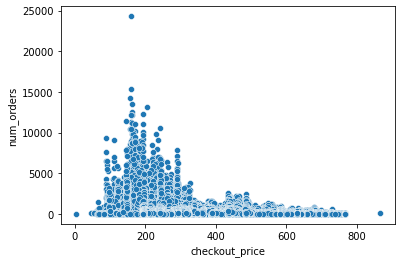

In [21]:
sns.scatterplot(data= df_data, x='checkout_price',y='num_orders')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


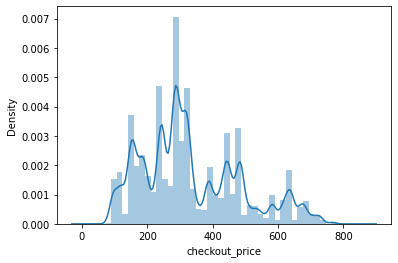

In [22]:
sns.distplot( df_data['checkout_price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


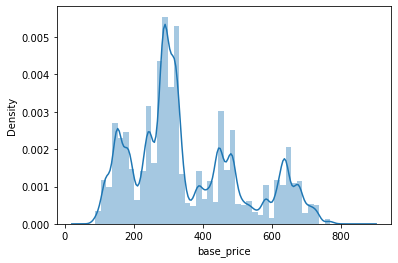

In [23]:
sns.distplot(df_data['base_price'])

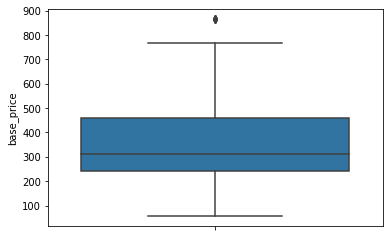

In [24]:
sns.boxplot(y=df_data['base_price'])  

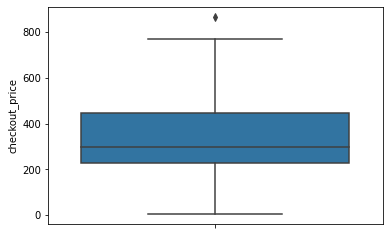

In [25]:
sns.boxplot(y=df_data['checkout_price']) 

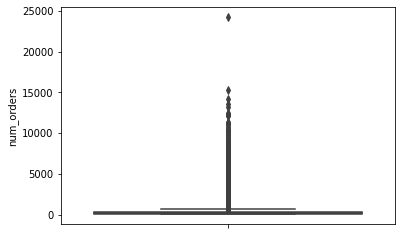

In [26]:
sns.boxplot(y=df_data['num_orders']) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


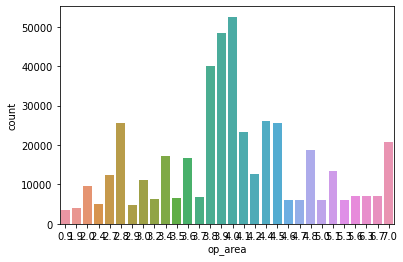

In [27]:
sns.countplot(df_data['op_area'])

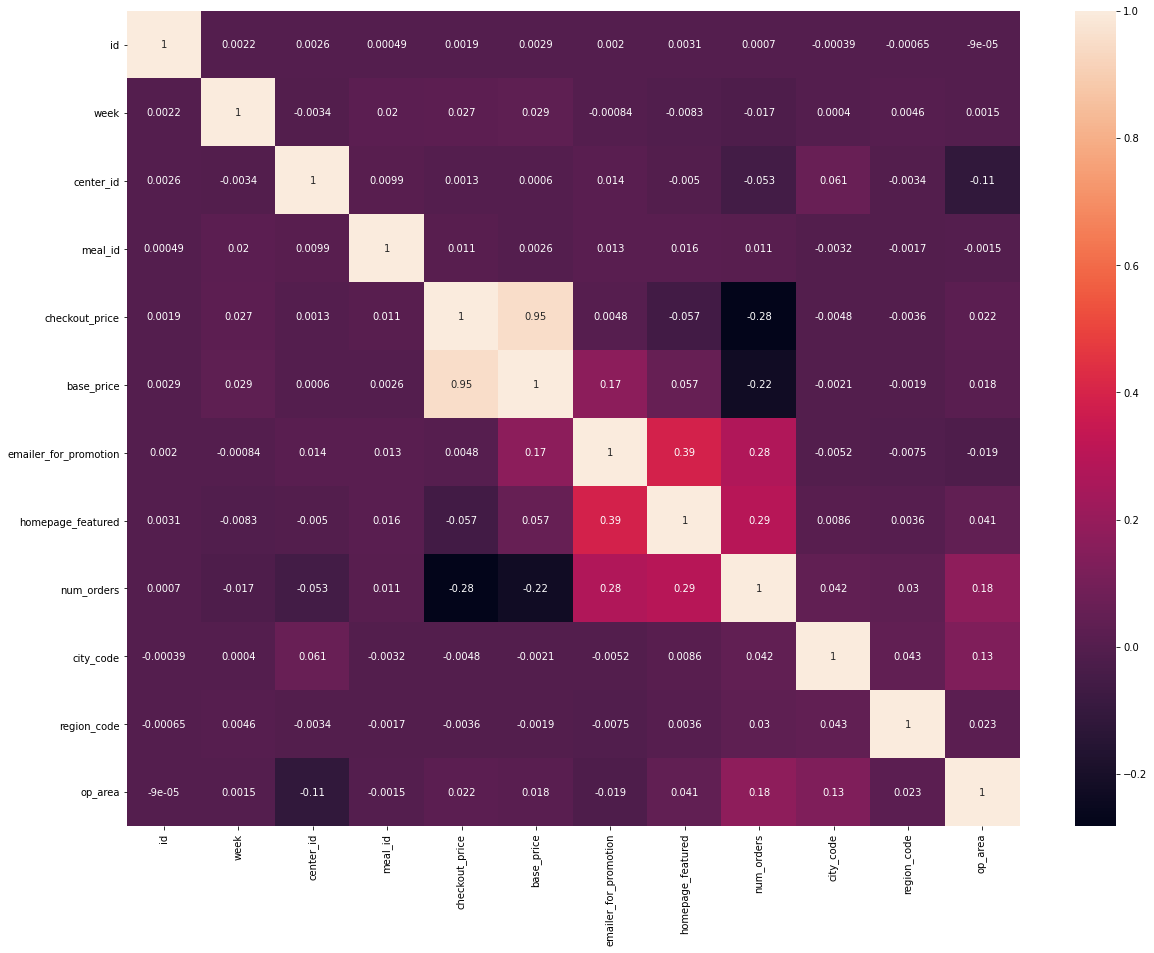

In [28]:
plt.figure(figsize=(20,15))
correlation=df_data.corr()
sns.heatmap(correlation, annot=True)

In [29]:
new_data=df_data.copy()
new_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


# Lables encoding

In [30]:
#Lables encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
new_data['Map_center_type']=label.fit_transform(new_data['center_type'])
new_test['Map_center_type']=label.fit_transform(new_test['center_type'])
new_data[['Map_center_type','center_type']].head()

,Map_center_type,center_type
0,2,TYPE_C
1,2,TYPE_C
2,2,TYPE_C
3,2,TYPE_C
4,2,TYPE_C


In [31]:
new_data['Map_category']=label.fit_transform(new_data['category'])
new_test['Map_category']=label.fit_transform(new_test['category'])
new_data['Map_cuisine']=label.fit_transform(new_data['cuisine'])
new_test['Map_cuisine']=label.fit_transform(new_test['cuisine'])
print(new_data[['Map_category','category']].head())
print("*................................................*")
print(new_data[['Map_cuisine','cuisine']].head())



   Map_category   category
0             0  Beverages
1             0  Beverages
2             0  Beverages
3             0  Beverages
4             0  Beverages
*................................................*
   Map_cuisine cuisine
0            3    Thai
1            3    Thai
2            3    Thai
3            3    Thai
4            3    Thai


In [53]:
#new_data=new_data.drop(['cuisine','category','center_type'],axis=1)
new_test=new_test.drop(['cuisine','category','center_type'],axis=1)

In [33]:
new_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,Map_center_type,Map_category,Map_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0,2,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2.0,2,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2.0,2,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2.0,2,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,4.5,0,4,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,4.5,0,4,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,4.5,0,4,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,4.5,0,4,0


In [34]:
y=new_data['num_orders']
X=new_data.drop(['num_orders'],axis=1)


In [35]:
y.shape

(456548,)

In [36]:
X.shape

(456548, 14)

# spliting dataset into traina and test

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,Map_center_type,Map_category,Map_cuisine
141016,1136831,129,89,1727,464.63,465.63,0,0,703,56,4.8,0,8,1
406574,1173698,89,149,2569,310.43,309.43,0,0,478,77,2.4,0,9,2
189872,1343343,100,51,2126,534.53,532.53,0,0,638,56,7.0,0,6,2
323934,1295774,117,161,2304,387.03,472.39,0,0,658,34,3.9,1,2,1
142275,1311191,85,91,1727,403.55,446.23,0,1,590,56,0.9,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,1367349,3,152,1109,304.58,305.58,0,0,576,34,4.0,1,8,1
439107,1225420,128,108,2956,630.53,630.53,0,0,579,56,4.4,1,4,0
117952,1081711,85,52,2322,368.66,450.14,0,0,685,56,5.6,1,0,0
435829,1205137,67,30,2577,290.03,290.03,0,0,604,56,3.5,0,13,3


In [39]:
y_train

141016    499
406574    148
189872     26
323934     28
142275    242
         ... 
152315    649
439107     94
117952    134
435829     96
305711     42
Name: num_orders, Length: 365238, dtype: int64

# Model Implementation

In [40]:
from sklearn.linear_model import LinearRegression

LR_model=LinearRegression()
LR_model.fit(X_train  ,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
LR_model.coef_

array([ 5.65080466e-07, -7.45886143e-02, -3.38072237e-01,  6.57078626e-04,
       -4.63225195e-01, -6.91706540e-01,  2.96204376e+02,  2.67179351e+02,
        1.14845093e-01,  6.00763917e-01,  6.23176120e+01, -3.67060858e+00,
        1.38674761e+01, -6.74602190e+01])

In [42]:
# Root Mean Squared Error on training dataset
predict_train = LR_model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test,predict_train)**(0.5)
print('RMSE OF linear_Reg:',RMSE)

RMSE OF linear_Reg: 346.3963446295481


In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train  ,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
from sklearn.metrics import mean_squared_log_error
predict_train2 = tree_model.predict(X_test)
MSLE_tree=mean_squared_log_error(y_test,predict_train2)**(0.5)
print('RMSE OF tree_Reg:',MSLE_tree)

RMSE OF tree_Reg: 0.6557969425383511


In [46]:
RMSE_tree=mean_squared_error(y_test,predict_train2)**(0.5)
print('RMSE OF Binary tree :',RMSE_tree)

RMSE OF Binary tree : 232.79001737925913


In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_model=RandomForestRegressor(n_estimators =10, random_state =101)
forest_model.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [74]:
predict_train3=forest_model.predict(X_test)
MSLE_forest=mean_squared_log_error(y_test,predict_train3)**(0.5)
print('MSLE OF forest_Reg:',MSLE_forest)

MSLE OF forest_Reg: 0.5091105265030447


In [75]:
RMSE_forest=mean_squared_error(y_test,predict_train3)**(0.5)
print('RMSE OF Random forest :',RMSE_forest)

RMSE OF Random forest : 161.63907978887062


In [68]:
predict_train4=forest_model.predict(new_test)

In [69]:
final_dataset=pd.DataFrame({'id':df_test.id,'num_orders':predict_train4})

In [60]:
final_dataset

,ID,num_orders
0,1028232,165.7
1,1127204,130.8
2,1212707,99.4
3,1082698,126.8
4,1400926,185.1
...,...,...
32568,1250239,42.1
32569,1039516,155.4
32570,1158107,61.2
32571,1444235,51.9


In [64]:
final_dataset.to_csv("/content/sample_submission_hSlSoT6.csv",index= False)